
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [1]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

## Delft, Netherlands

In [2]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 1 # 6 minutes hour of simulation
params.nP = 200 # reuqests (and passengers)
params.nV = 20 # vehicles


## Parameters for ExMAS

In [3]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [4]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

24-02-23 21:54:41-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
24-02-23 21:54:41-INFO-creating combinations
24-02-23 21:54:41-INFO-39800	 nR*(nR-1)
24-02-23 21:54:42-INFO-Reduction of feasible pairs by 99.32%
24-02-23 21:54:42-INFO-Degree 2 	Completed
24-02-23 21:54:43-INFO-trips to extend at degree 2 : 635
24-02-23 21:54:43-INFO-At degree 2 feasible extensions found out of 104 searched
24-02-23 21:54:43-INFO-Degree 3 	Completed
24-02-23 21:54:43-INFO-trips to extend at degree 3 : 104
24-02-23 21:54:44-INFO-At degree 3 feasible extensions found out of 9 searched
24-02-23 21:54:44-INFO-Degree 4 	Completed
24-02-23 21:54:44-INFO-Max degree reached 4
24-02-23 21:54:44-INFO-Trips still possible to extend at degree 4 : 9


In [5]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

24-02-23 21:54:45-INFO-Matching 200 trips to 948 rides in order to min u_veh
24-02-23 21:54:45-INFO-Problem solution: Optimal. 
Total costs for single trips:         52,290 
reduced by matching to:               39,462


In [6]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],1.097500,59,1,[1.0975000000000001],"[0, 59]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44810823, 1413910861]","[None, 0, 0]",node time req_id od 0 ...,59,0.59,0.891000,0.178200,0.7128
1,[1],6.097000,329,1,[6.0969999999999995],"[5, 329]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 1433962926, 643586567]","[None, 1, 1]",node time req_id od 0 ...,329,3.29,4.945500,0.989100,3.9564
2,[2],1.150000,62,1,[1.1500000000000001],"[6, 62]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 2598004622, 44829650]","[None, 2, 2]",node time req_id od 0 ...,62,0.62,0.933000,0.186600,0.7464
3,[3],4.904000,265,1,[4.904],"[28, 265]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1965457550, 5714816833]","[None, 3, 3]",node time req_id od 0 ...,265,2.65,3.976500,0.795300,3.1812
4,[4],6.532000,353,1,[6.532],"[31, 353]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44891904, 313319585]","[None, 4, 4]",node time req_id od 0 N...,353,3.53,5.296500,1.059300,4.2372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,"[31, 21, 49, 44]",27.898550,814,41,"[8.536875, 10.336175, 5.601675, 3.423825]","[407.5, 122, 102, 84, 200, 36, 105, 165]","[31, 21, 49, 44]","[44, 49, 31, 21]",4,943,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44712554, 1512025407, 1402734506, 14027...","[None, 31, 21, 49, 44, 44, 49, 31, 21]",node time req_id od 0 ...,814,8.14,17.588250,3.517650,14.0706
944,"[65, 86, 94, 95]",33.443800,890,41,"[10.26005, 10.810225, 7.849725, 4.523800000000...","[1294.5, 118, 90, 124, 273, 97, 42, 146]","[65, 86, 94, 95]","[95, 65, 94, 86]",4,944,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 3555415462, 44782465, 260125197, 672983...","[None, 65, 86, 94, 95, 95, 65, 94, 86]",node time req_id od 0 ...,890,8.90,21.177000,4.235400,16.9416
945,"[126, 133, 139, 136]",18.914300,606,42,"[3.6500000000000004, 6.10705, 5.907375, 3.2498...","[2130.5, 143, 4, 82, 26, 184, 149, 18]","[126, 133, 139, 136]","[126, 136, 133, 139]",4,945,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44880444, 44838391, 44836969, 44822489,...","[None, 126, 133, 139, 136, 126, 136, 133, 139]",node time req_id od 0 ...,606,6.06,12.084750,2.416950,9.6678
946,"[16, 28, 22, 29]",31.331175,803,41,"[9.963725, 8.1604, 8.79745, 4.4096]","[361.5, 61, 116, 101, 258, 66, 123, 78]","[16, 28, 22, 29]","[29, 28, 16, 22]",4,946,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1435362512, 44841166, 588465822, 448331...","[None, 16, 28, 22, 29, 29, 28, 16, 22]",node time req_id od 0 ...,803,8.03,20.179125,4.035825,16.1433


In [7]:
params.kpi = 1

In [9]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate

0.5
24-02-23 09:52:36-CRITICAL-this is request 0 with [0, 234, 235, 331] available rides.
24-02-23 09:52:36-CRITICAL-ride 0 available [1]
24-02-23 09:52:36-CRITICAL-ride 234 available [1, 0]
24-02-23 09:52:36-CRITICAL-ride 235 available [1, 0]
24-02-23 09:52:36-CRITICAL-ride 331 available [1, 0]
24-02-23 09:52:36-CRITICAL-this is reuqest 0 with [0, 234, 235, 331] still available rides.
24-02-23 09:52:36-CRITICAL-vehicle 1 has 4 choices
0.5
0.5
0.5
0.5
24-02-23 09:52:36-CRITICAL-this is request 4 with [4, 204, 234, 331] available rides.
24-02-23 09:52:36-CRITICAL-ride 4 available [1]
24-02-23 09:52:36-CRITICAL-ride 204 available [1, 0]
24-02-23 09:52:36-CRITICAL-ride 234 not available [5, 1]
24-02-23 09:52:36-CRITICAL-ride 331 not available [5, 1]
24-02-23 09:52:36-CRITICAL-this is reuqest 4 with [4, 204] still available rides.
24-02-23 09:52:36-CRITICAL-vehicle 4 has 2 choices
0.5
0.5
24-02-23 09:52:36-CRITICAL-this is request 6 with [6, 204, 235] available rides.
24-02-23 09:52:36-CRI

In [10]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,9.0,0.0,False,0,0,9828.0,75.0,0,750.0,0,...,0,0,7797.0,1441.0,0,1438.0,1095.0,3823.0,29.032,4.8114
2,7.0,0.0,False,0,0,9631.0,90.0,0,188.0,0,...,0,0,8717.0,1894.0,0,869.0,488.0,5466.0,23.594,1.0176
3,0.0,0.0,False,0,0,2766.0,0.0,0,0.0,0,...,0,0,18833.0,0.0,0,0.0,0.0,18833.0,0.000,0.0000
4,3.0,0.0,False,0,0,4426.0,45.0,0,60.0,0,...,0,0,15894.0,796.0,0,288.0,195.0,14615.0,7.964,6.0876
5,5.0,0.0,False,0,0,11756.0,60.0,0,108.0,0,...,0,0,7485.0,1416.0,0,624.0,318.0,5127.0,17.266,2.8272
6,14.0,0.0,False,0,0,8605.0,165.0,0,406.0,0,...,0,0,8044.0,2993.0,0,966.0,991.0,3094.0,37.013,4.8492
7,12.0,0.0,False,0,0,9793.0,135.0,0,463.0,0,...,0,0,7124.0,2052.0,0,1672.0,958.0,2442.0,31.328,2.4012
8,16.0,0.0,False,0,0,8830.0,165.0,0,551.0,0,...,0,0,7795.0,2340.0,0,1438.0,1196.0,2821.0,37.370,9.6948
9,9.0,0.0,False,0,0,10681.0,120.0,0,344.0,0,...,0,0,7873.0,2006.0,0,305.0,734.0,4828.0,22.299,4.3224


In [11]:
sim.res[0].veh_exp['REVENUE'].to_list()

[4.811400000000001,
 1.0176,
 0.0,
 6.0876,
 2.8272,
 4.849200000000001,
 2.4012000000000002,
 9.694799999999997,
 4.3224,
 6.961500000000001,
 3.4776000000000002,
 2.8476000000000004,
 2.5140000000000002,
 0.7764,
 3.3263999999999996,
 3.6036,
 4.3824,
 2.2236000000000002,
 0.3492,
 2.0027999999999997]

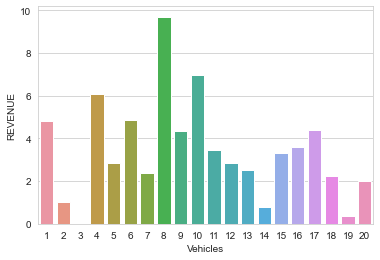

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [13]:
sim.res[0].all_kpi # All driver revenue 

68.47649999999999

# Strategy 2: 

# params.kpi = 2 (Solo ride-hailing) 


In [68]:
params.kpi = 2

In [69]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

23-02-23 13:31:38-WARNING-Setting up 4h simulation at 2023-02-23 11:16:43 for 20 vehicles and 200 passengers in Delft, Netherlands
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
23-02-23 13:31:39-CRITICAL-this is request 7 with [7, 305] available rides.
23-02-23 13:31:39-CRITICAL-ride 7 available [1]
23-02-23 13:31:39-CRITICAL-ride 305 available [1, 0]
23-02-23 13:31:39-CRITICAL-this is reuqest 7 with [7, 305] still available rides.
23-02-23 13:31:39-CRITICAL-vehicle 4 has 2 choices
23-02-23 13:31:39-CRITICAL-vehicle 4 has chosen to serve request 7 with a ride 7 of degree 1, with travellers [7].
0.5
23-02-23 13:31:39-CRITICAL-this is request 8 with [8, 305] available rides.
23-02-23 13:31:39-CRITICAL-ride 8 available [1]
23-02-23 13:31:39-CRITICAL-ride 305 not available [5, 1]
23-02-23 13:31:39-CRITICAL-this is reuqest 8 with [8] still available rides.
0.5
0.5
0.5
23-02-23 13:31:39-CRITICAL-this is request 11 with [11, 292] available rides.
23-02-23 13:31:39-CRITICAL-ride 11 available [1]
23-02-23 13

In [70]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,14,0.0,False,0,0,7778.0,180.0,0,365.0,0,...,0,0,7685.0,3557.0,0,1614.0,965.0,1549.0,40.903,1.3272
2,11,0.0,False,0,0,10852.0,120.0,0,486.0,0,...,0,0,6334.0,2561.0,0,916.0,936.0,1921.0,34.848,9.0675
3,14,0.0,False,0,0,9535.0,180.0,0,251.0,0,...,0,0,7358.0,2789.0,0,1068.0,849.0,2652.0,30.632,2.7660
4,11,0.0,False,0,0,9325.0,150.0,0,206.0,0,...,0,0,8000.0,2632.0,0,956.0,686.0,3726.0,29.433,7.7112
5,9,0.0,False,0,0,10771.0,135.0,0,175.0,0,...,0,0,7988.0,1725.0,0,535.0,580.0,5148.0,17.278,0.9816
6,13,0.0,False,0,0,9185.0,165.0,0,329.0,0,...,0,0,7314.0,2577.0,0,1639.0,884.0,2214.0,30.808,2.4048
7,11,0.0,False,0,0,10567.0,135.0,0,400.0,0,...,0,0,7337.0,2152.0,0,678.0,865.0,3642.0,26.442,4.4004
8,7,0.0,False,0,0,10613.0,105.0,0,140.0,0,...,0,0,8236.0,1553.0,0,742.0,455.0,5486.0,15.555,3.2052
9,12,0.0,False,0,0,9863.0,135.0,0,252.0,0,...,0,0,7769.0,2404.0,0,816.0,747.0,3802.0,29.273,4.0032


In [71]:
sim.res[0].veh_exp['REVENUE'].to_list()

[1.3272000000000002,
 9.067499999999999,
 2.7660000000000005,
 7.7112,
 0.9815999999999999,
 2.4048000000000003,
 4.400399999999999,
 3.2052,
 4.0032,
 4.251600000000001,
 2.4,
 2.1564,
 4.975200000000001,
 0.42479999999999996,
 1.2611999999999999,
 3.8160000000000003,
 3.186,
 1.1352,
 2.7372,
 1.2408000000000001]

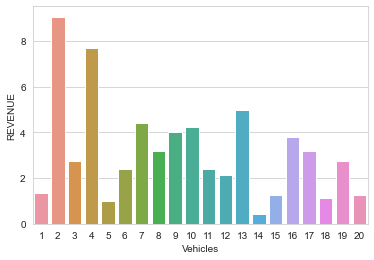

In [72]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [73]:
sim.res[0].all_kpi # All driver revenue 

63.451499999999996

# Strategy 3: 
# params.kpi = 3 (Nearest pickup ride-pooling)


In [74]:
params.kpi = 3

In [75]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

23-02-23 13:31:52-WARNING-Setting up 4h simulation at 2023-02-23 11:16:43 for 20 vehicles and 200 passengers in Delft, Netherlands
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
23-02-23 13:31:53-CRITICAL-this is request 7 with [7, 305] available rides.
23-02-23 13:31:53-CRITICAL-ride 7 available [1]
23-02-23 13:31:53-CRITICAL-ride 305 available [1, 0]
23-02-23 13:31:53-CRITICAL-this is reuqest 7 with [7, 305] still available rides.
hell
23-02-23 13:31:53-CRITICAL-vehicle 18 has 2 choices
23-02-23 13:31:53-CRITICAL-vehicle 18 has chosen to serve request 7 with a ride 305 of degree 2, with travellers [7, 8].
0.5
23-02-23 13:31:53-CRITICAL-this is request 8 with [8, 305] available rides.
23-02-23 13:31:53-CRITICAL-ride 8 available [1]
23-02-23 13:31:53-CRITICAL-ride 305 not available [5, 1]
23-02-23 13:31:53-CRITICAL-this is reuqest 8 with [8] still available rides.
0.5
0.5
0.5
23-02-23 13:31:53-CRITICAL-this is request 11 with [11, 292] available rides.
23-02-23 13:31:53-CRITICAL-ride 11 available [1]

In [76]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,14,0.0,False,0,0,7778.0,180.0,0,365.0,0,...,0,0,7685.0,3557.0,0,1614.0,965.0,1549.0,40.903,1.3272
2,12,0.0,False,0,0,9863.0,135.0,0,252.0,0,...,0,0,7769.0,2404.0,0,816.0,747.0,3802.0,29.273,4.0032
3,10,0.0,False,0,0,8854.0,92.0,0,227.0,0,...,0,0,8824.0,2187.0,0,1115.0,619.0,4903.0,30.442,4.2516
4,11,0.0,False,0,0,10567.0,135.0,0,400.0,0,...,0,0,7337.0,2152.0,0,678.0,865.0,3642.0,26.442,4.4004
5,11,0.0,False,0,0,7003.0,120.0,0,642.0,0,...,0,0,11014.0,1611.0,0,879.0,1092.0,7432.0,24.163,1.2408
6,14,0.0,False,0,0,9535.0,180.0,0,251.0,0,...,0,0,7358.0,2789.0,0,1068.0,849.0,2652.0,30.632,2.7660
7,10,0.0,False,0,0,10913.0,135.0,0,246.0,0,...,0,0,7005.0,2148.0,0,852.0,681.0,3324.0,24.086,2.4000
8,11,0.0,False,0,0,10852.0,120.0,0,486.0,0,...,0,0,6334.0,2561.0,0,916.0,936.0,1921.0,34.848,9.0675
9,6,0.0,False,0,0,11164.0,90.0,0,120.0,0,...,0,0,8385.0,1121.0,0,539.0,390.0,6335.0,11.246,1.1352


In [77]:
sim.res[0].veh_exp['REVENUE'].to_list()

[1.3272000000000002,
 4.0032,
 4.251600000000001,
 4.400399999999999,
 1.2408000000000001,
 2.7660000000000005,
 2.4,
 9.067499999999999,
 1.1352,
 3.8160000000000003,
 0.9815999999999999,
 2.1564,
 3.186,
 2.4048000000000003,
 3.2052,
 4.975200000000001,
 2.7372,
 7.7112,
 1.2611999999999999,
 0.42479999999999996]

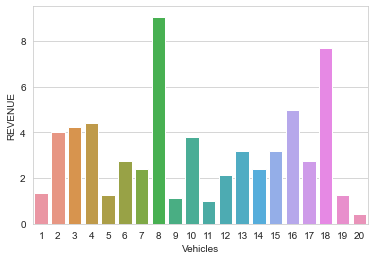

In [78]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [79]:
sim.res[0].all_kpi # All driver revenue 

63.451499999999996

# All in one Simulation  

In [ ]:
responses = []
avg_kpi = []
idle_time = []

for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
    sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/veh{}.csv'.format(i))
    sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/pax{}.csv'.format(i))
    #['Vehicles'] = sim.res[0].veh_exp.index
    sim.res[0].veh_exp['ds'] = f"{i}"
    
    responses.append(sim.res[0].veh_exp)
    
    vehicles = sim.res[0].veh_exp.loc[sim.res[0].veh_exp["nRIDES"] > 0]
    no_of_veh = len(vehicles)
    
    avg_kpi.append(sim.res[0].all_kpi/no_of_veh)
    idle_time.append(vehicles['IDLE'].sum()/no_of_veh)
    

24-02-23 21:55:03-INFO-Matching 200 trips to 948 rides in order to min u_veh
24-02-23 21:55:03-INFO-Problem solution: Optimal. 
Total costs for single trips:         52,290 
reduced by matching to:               39,462
0.5
0.5
24-02-23 21:55:21-CRITICAL-this is request 1 with [1, 276, 321, 697] available rides.
24-02-23 21:55:21-CRITICAL-ride 1 available [1]
24-02-23 21:55:21-CRITICAL-ride 276 available [1, 0]
24-02-23 21:55:21-CRITICAL-ride 321 available [1, 0]
24-02-23 21:55:21-CRITICAL-ride 697 available [1, 0]
24-02-23 21:55:21-CRITICAL-this is reuqest 1 with [1, 276, 321, 697] still available rides.
24-02-23 21:55:21-CRITICAL-vehicle 17 has 4 choices
0.5
0.5
24-02-23 21:55:21-CRITICAL-this is request 3 with [3, 545, 834] available rides.
24-02-23 21:55:21-CRITICAL-ride 3 available [1]
24-02-23 21:55:21-CRITICAL-ride 545 available [1, 0]
24-02-23 21:55:21-CRITICAL-ride 834 available [1, 0]
24-02-23 21:55:21-CRITICAL-this is reuqest 3 with [3, 545, 834] still available rides.
24-02-

# Performance Parameters for Driver

In [10]:
import pandas as pd
index = pd.Index(['Revenue', 'Profit', 'Cost', 'Idle Time'])
driver_data = pd.DataFrame({"Profit Maximization":[], "Pooled Ride": [], "Private Ride": []})
driver_data.loc['Revenue'] = avg_kpi
driver_data.loc['Idle Time'] = idle_time
driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)

In [11]:
driver_data

,Profit Maximization,Pooled Ride,Private Ride
Revenue,4.00932,3.43992,4.17798
Idle Time,83.80000,526.60000,593.60000
Cost,2.00466,1.71996,2.08899


In [ ]:
csv_data = driver_data.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/nV20.csv')

In [14]:
print('\nCSV String:\n', csv_data)


CSV String:
 ,Profit Maximization,Pooled Ride,Private Ride
Revenue,4.5588,1.5444,1.5444
Idle Time,6602.2,10540.2,10519.2
Cost,2.2794,0.7722,0.7722

